<center><h1>Topic Modeling</h1>

<center><h2>Latent Dirichlet Allocation (LDA)</h2>

# LDA    
- LDA allows us to analyze large amount of data by clustering documents into topics.
- This data is unlabeled in general.
- LDA is based on the probability distribution i.e it gives out the probability of document belonging to topic1, topic2 and so on.
- And probability of word belonging to topic1, and so on.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import random

import warnings
warnings.filterwarnings('ignore')

In [146]:
# Importing the dataset
df = pd.read_csv('/content/drive/My Drive/LDA/npr.csv')

print('Shape of the dataframe:', df.shape, '\n\nColumns of dataframe:', df.columns)

Shape of the dataframe: (11992, 1) 

Columns of dataframe: Index(['Article'], dtype='object')


In [77]:
# importing the dataset
df = pd.read_csv('/content/drive/My Drive/LDA/npr.csv')

print('Shape of the dataframe:', df.shape, '\n\nColumns of dataframe:', df.columns)

print('\nHead of the datafame:\n')
df.head()

Shape of the dataframe: (11992, 1) 

Columns of dataframe: Index(['Article'], dtype='object')

Head of the datafame:



,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [41]:
print('Head of the datafame:\n')

df.head()

Head of the datafame:



,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


### Observation:

- Dataset has only one column 'Article'.
- Since there is no label to this dataset, we now will try to create a label.
- We will try to create a label with one of the Top Modelling's technique 'Latent Dirichlet Allocation' (LDA).

### Let's check if there any null values

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11992 entries, 0 to 11991
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Article  11992 non-null  object
dtypes: object(1)
memory usage: 93.8+ KB


### Observation:

- There are no null values.

### Let's check the mean, minimum and maximum length of the text for every data point.

In [78]:
text_len = df.Article.apply(lambda x: len(x))

print('\nMinimum length of the text:', text_len.min())
print('\nMaximum length of the text:', text_len.max())
print('\nMean length of the text:', int(text_len.mean()))


Minimum length of the text: 59

Maximum length of the text: 54078

Mean length of the text: 4537


### Observation:

- From the minimum, maximum and mean length of the text data, we can analyze that all the questions has enough text data to convey an information.

In [0]:
# deep copy to avoid override of the original dataframe
import copy

df_new = copy.deepcopy(df)

### FYI:

 - __As our objective is only to understand the basic application of LDA for topic modelling, I am not doing any Exploratory Data Analysis part.__
 - __In addition to above, I am not doing data preprocessing such as lemmatization or stemming, punctuation remove, etc.__
 - __One can do Exploratory Data Analysis, data preprocessing, etc, to get the better understanding of the data, and for the better result.__


### Vectorization of the text data with CountVectorizer
- One can use other vectorization technique such as Bag of Words, Word2Vec, Average Word2Vec.

In [66]:
# importing TFIDF vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# creating an instance
cv = CountVectorizer(max_df = 0.90, min_df = 2, stop_words = 'english')

# fit and transform the text data
cv_fit = cv.fit_transform(df_new.Article)

print('\nShape of the sparse matrix\n')
cv_fit


Shape of the sparse matrix



<11992x54777 sparse matrix of type '<class 'numpy.int64'>'
	with 3033388 stored elements in Compressed Sparse Row format>

### Note:

- Here, I have set few parameters in Count Vectorizer.
- max_df is set to 0.90 which means while building a vocabulary, it will not consider those vocabulary words that has the frequency of more than 90% across the documents.
- min_df is set to 2 (integet value or you can give float value ranging from 0.0 to 1.0) which means while building a vocabulary, it will not consider those vocabulary words that has the frequency in less than 2 documents i.e vocabulary should occur in at least 2 documents.
- Removing stopwords by mentioning stop_words as 'english'
- You can play around with the hyperparameters mentioned above or even other hyperparameters like ngram_range, etc.

<center><h2>Latent Dirichlet Allocation (LDA)</h2>

### FYI:
- __In LDA, deciding into how many topics we want to divide the documents depends on the domain knowledge and the indvidiual's idea on the dataset.__
- __I will consider 10 topics to be divided into.__

In [0]:
# importing Latent Dirichlet Allocation library
from sklearn.decomposition import LatentDirichletAllocation

# creating an instance for LDA
lda = LatentDirichletAllocation(n_components = 5, random_state = 1)

In [68]:
%%time

print('Fitting the vectorzer with the LDA')

lda.fit(cv_fit)

Fitting the vectorzer with the LDA
CPU times: user 2min 9s, sys: 2.28 s, total: 2min 12s
Wall time: 2min 9s


In [0]:
# import pickle
# pickle.dump(lda, open('/content/drive/My Drive/LDA/lda_npr.pkl', 'wb'))

### Let us now check words belonging to each topic with feature names

In [72]:
print('Number of topics:', len(lda.components_))
print('Number of columns of the lda fit:', len(lda.components_[0]))

Number of topics: 5
Number of columns of the lda fit: 54777


In [79]:
feature = cv.get_feature_names()

print('Length of feature names:', len(feature))

Length of feature names: 54777


### Let us now print top 50 feature names (words) belonging to the topics. Based on thest 20 top feature names (words), we will get an idea of what those topics belongs to.

In [74]:
for ind, topic in enumerate(lda.components_):
    print('Top 50 words in topic {}'.format(ind))
    print('-'*25)
    top_50 = topic.argsort()[-50:]
    print([feature[i] for i in top_50], '\n\n')

Top 50 words in topic 0
-------------------------
['change', 'brain', 'science', 'million', 'according', 'used', 'scientists', 'know', 'data', 'drug', 'going', 'lot', 'children', 'think', 'women', 'companies', 'researchers', 'world', 'say', 'insurance', 'really', 'water', 'way', 'company', '000', 'work', 'need', 'disease', 'help', 'medical', 'said', 'patients', 'use', 'university', 'make', 'research', 'time', 'year', 'don', 'years', 'study', 'food', 'just', 'percent', 'care', 'new', 'like', 'health', 'people', 'says'] 


Top 50 words in topic 1
-------------------------
['look', 'long', 'song', 'great', 'man', 'come', 'film', 'women', 'best', 'different', 'right', 'family', 'feel', 'black', 'said', 'year', 'say', 'got', 'good', 'day', 'thing', 'want', 'didn', 'lot', 'little', 'did', 'love', 'work', 'kind', 'going', 'book', 'story', 'make', 'things', 've', 'don', 'music', 'world', 'years', 'life', 'really', 'way', 'know', 'think', 'new', 'time', 'says', 'people', 'just', 'like'] 


Top 

### Now that we are done seeing words belonging to topic, we will now see documents belonging to the topics

In [83]:
len(lda.components_[1])

54777

In [84]:
# transform 
df_final = lda.transform(cv_fit)

print('Shape of the df_final:', df_final.shape)

Shape of the df_final: (11992, 5)


### Observation:

- We can see that the shape is (11992, 5) i.e number of columns are 5 as we have created 5 components.
- Now, we will see a random row which will have the probability distribution of document belonging to the topic.

In [113]:
print('\nChecking the probability distribution of one text data belonging to the topic.\n')

print('Few words from 1st row:', df_new.Article[0][:88], '\n')

print('Probability distribution:', df_final[0])


Checking the probability distribution of one text data belonging to the topic.

Few words from 1st row: In the Washington of 2016, even when the policy can be bipartisan, the politics cannot.  

Probability distribution: [3.21295147e-04 3.21328545e-04 3.20057731e-04 9.22736018e-01
 7.63013008e-02]


- For a clear understanding, let us check with the round value of 2

In [107]:
prob = df_final[0][df_final[0].argmax()].round(2)

print('Document belong to the topic', df_final[0].argmax(), 'with the probability of', prob)

Document belong to the topic 3 with the probability of 0.92


### Observation
- We can see that the document belongs to the topic 3 as it has the highest probability of 0.75.

### Assigning the topics to the dataframe

In [114]:
df_new['topic'] = df_final.argmax(axis = 1)

df_new.head()

,Article,topic
0,"In the Washington of 2016, even when the polic...",3
1,Donald Trump has used Twitter — his prefe...,3
2,Donald Trump is unabashedly praising Russian...,3
3,"Updated at 2:50 p. m. ET, Russian President Vl...",3
4,"From photography, illustration and video, to d...",2


### Mapping topics with label

In [115]:
# creating a dictionary with key as topic numbers and value as topic names
topic_label = {0:'Healthcare', 1:'Entertainment', 2:'Education', 3:'Politics', 4:'Military', }

# mapping the dictionary with the dataframe to get the labels.
df_new['topic_name'] = df_new['topic'].map(topic_label)

# head of the dataframe
df_new.head()

,Article,topic,topic_name
0,"In the Washington of 2016, even when the polic...",3,Politics
1,Donald Trump has used Twitter — his prefe...,3,Politics
2,Donald Trump is unabashedly praising Russian...,3,Politics
3,"Updated at 2:50 p. m. ET, Russian President Vl...",3,Politics
4,"From photography, illustration and video, to d...",2,Education


## Visualization of the topics

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

In [0]:
def word_cloud(topic):
    # plt.figure(figsize = (8,6))
    topic_words = [feature[i] for i in lda.components_[topic].argsort()[-50:]]
    cloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',
                      width=2500, height=1800).generate(" ".join(topic_words))

    print('\nWorcloud for topic:', topic, '\n')
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()


Worcloud for topic: 0 



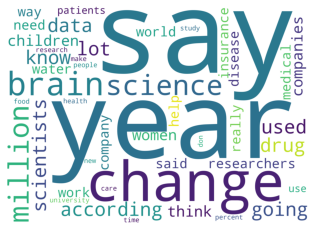

In [138]:
# calling word_cloud for topic 0
word_cloud(0)


Worcloud for topic: 1 



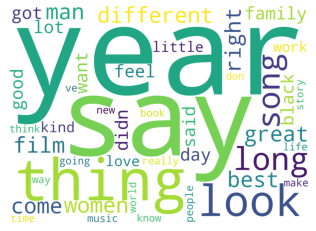

In [139]:
# calling word_cloud for topic 1
word_cloud(1)


Worcloud for topic: 2 



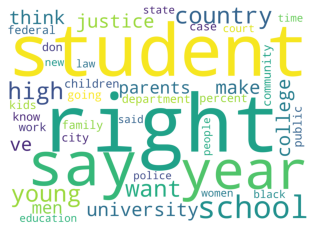

In [140]:
# calling word_cloud for topic 2
word_cloud(2)


Worcloud for topic: 3 



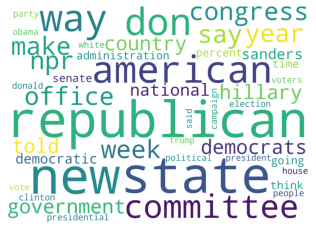

In [141]:
# calling word_cloud for topic 3
word_cloud(3)


Worcloud for topic: 4 



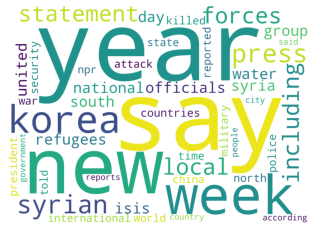

In [142]:
# calling word_cloud for topic 4
word_cloud(4)

In [0]:
### Visualizing with wordcloud

 ### Visualizing with pyLDAvis

In [143]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.7MB/s 
     |████████████████████████████████| 552kB 16.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=037fc3602115bd0bbc00d3e8c9c712b4cce89c93305a6ff1e7ba7e4e22f87a14
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=a2fdddfced6998e71e4254404d31c8ac0e7835aeebc2ca9f7e5fc5b28dfe348f
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
from sklearn.manifold import TSNE
import pyLDAvis.sklearn

In [145]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, tf_fit, tf, mds='tsne')
dash

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  26.064683
0       51.163364 -159.968018       2        1  21.634229
3      -73.144554   21.523815       3        1  21.447851
4      -66.410133 -110.606438       4        1  15.437378
2       54.417324   12.443444       5        1  15.415859, topic_info=            Term          Freq         Total Category  logprob  loglift
50426      trump  22503.000000  22503.000000  Default  30.0000  30.0000
42993       says  45428.000000  45428.000000  Default  29.0000  29.0000
9767     clinton   7251.000000   7251.000000  Default  28.0000  28.0000
38079  president  11378.000000  11378.000000  Default  27.0000  27.0000
22673     health   8430.000000   8430.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
33390        new   2185.633909  17313.453501   Topic5  -5.7648  -0.1998
42985        say   1786.669276   9399.916814   Topic5  -5.9664   0.2094
36310    percent   1655.573781   7918.394012   Topic5  -6.0426   0.3047
21073      going   1633.911689   9346.838305   Topic5  -6.0557   0.1257
18079     family   1542.268188   5799.365935   Topic5  -6.1135   0.5453

[462 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
1          1  0.026947    000
1          2  0.375584    000
1          3  0.106301    000
1          4  0.297903    000
1          5  0.193088    000
...      ...       ...    ...
54412      4  0.136562  years
54412      5  0.203338  years
54436      1  0.003835  yemen
54436      4  0.993376  yemen
54692      2  0.999199   zika

[1197 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 5, 3])

<center><h1>End</h1>